In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
mat=pd.read_csv("matches.csv")

In [10]:
dev=pd.read_csv("deliveries.csv")

In [11]:
mat.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [12]:
mat.shape

(1095, 20)

In [13]:
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [14]:
mat.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [15]:
# city with most matches won
mat.groupby(["city"]).agg({"winner":["count"]}).max()

,,0
winner,count,173


In [16]:
mat.groupby(["city"]).agg({"winner":["count"]}).sort_values(ascending=False,by=("winner","count")).head(1)

,winner
,count
city,
Mumbai,173


In [17]:
# team that won most matches
mat["winner"].value_counts().head(1)

,count
winner,
Mumbai Indians,144


In [18]:
# player who won most of man of the match awards
mat["player_of_match"].value_counts().head(1)

,count
player_of_match,
AB de Villiers,25


In [19]:
# most frequent umpire 1
mat["umpire1"].value_counts().head(1)

,count
umpire1,
AK Chaudhary,115


In [20]:
# most frequent umpire 1
mat["umpire2"].value_counts().head(1)

,count
umpire2,
S Ravi,83


In [21]:
mat.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1095.0,904828.319635,367740.242299,335982.0,548331.5,980961.0,1254062.5,1426312.0
result_margin,1076.0,17.259294,21.787444,1.0,6.0,8.0,20.0,146.0
target_runs,1092.0,165.684066,33.427048,43.0,146.0,166.0,187.0,288.0
target_overs,1092.0,19.759341,1.581108,5.0,20.0,20.0,20.0,20.0


In [22]:
dev.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,1.0,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,2.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,3.0,BB McCullum,P Kumar,SC Ganguly,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,4.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,5.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN


In [23]:
dev.shape

(122607, 17)

In [24]:
dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122607 entries, 0 to 122606
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          122607 non-null  int64  
 1   inning            122607 non-null  int64  
 2   batting_team      122607 non-null  object 
 3   bowling_team      122607 non-null  object 
 4   over              122606 non-null  float64
 5   ball              122606 non-null  float64
 6   batter            122606 non-null  object 
 7   bowler            122606 non-null  object 
 8   non_striker       122606 non-null  object 
 9   batsman_runs      122606 non-null  float64
 10  extra_runs        122606 non-null  float64
 11  total_runs        122606 non-null  float64
 12  extras_type       6758 non-null    object 
 13  is_wicket         122606 non-null  float64
 14  player_dismissed  6068 non-null    object 
 15  dismissal_kind    6068 non-null    object 
 16  fielder           43

<Axes: xlabel='winner'>

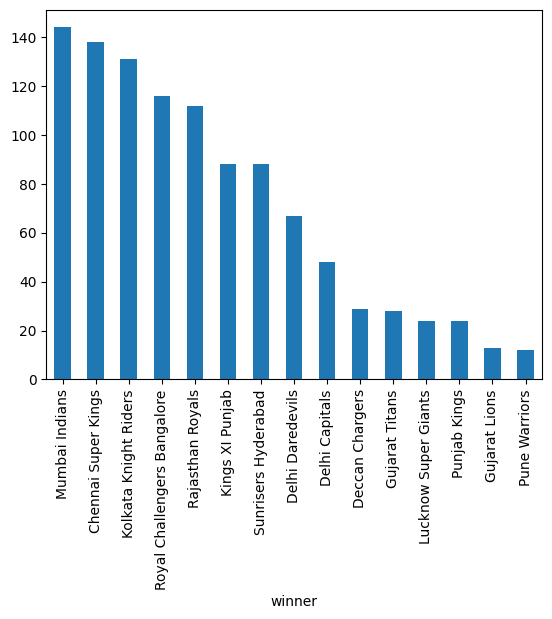

In [25]:
mat["winner"].value_counts().head(15).plot(kind="bar")

In [26]:
mat.winner.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

<Axes: xlabel='player_of_match'>

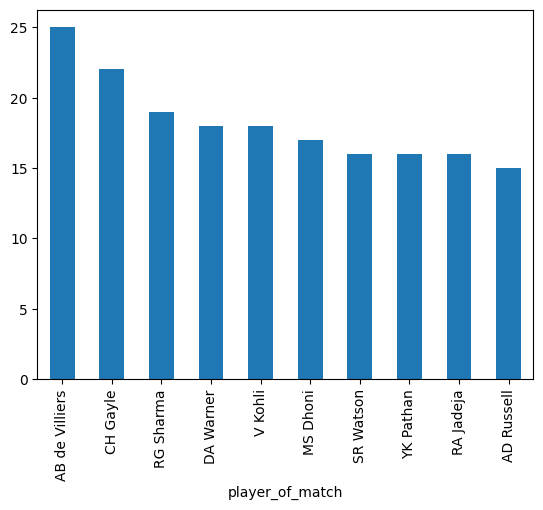

In [27]:
mat["player_of_match"].value_counts().head(10).plot(kind="bar")

<Axes: xlabel='toss_winner'>

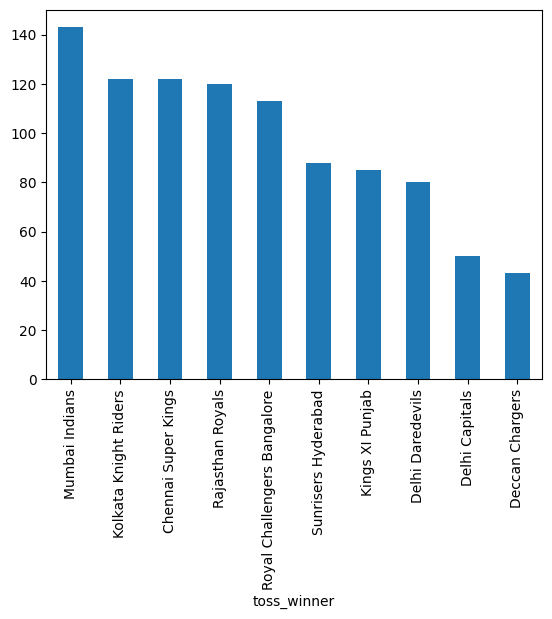

In [28]:
mat["toss_winner"].value_counts().head(10).plot(kind="bar")

In [29]:
mat.groupby(["toss_winner"]).agg({"winner":["count"]}).max()


,,0
winner,count,143


In [30]:
mat.groupby(["toss_winner"]).agg({"winner":["count"]}).sort_values(ascending=False,by=("winner","count")).head(1)

,winner
,count
toss_winner,
Mumbai Indians,143


In [ ]:
mat=mat.rename(columns={"id":"match_id"})

In [31]:
mat

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [ ]:
dev.head(250)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,335983,1,Chennai Super Kings,Kings XI Punjab,3,1,MEK Hussey,S Sreesanth,ML Hayden,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
246,335983,1,Chennai Super Kings,Kings XI Punjab,3,2,MEK Hussey,S Sreesanth,ML Hayden,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
247,335983,1,Chennai Super Kings,Kings XI Punjab,3,3,MEK Hussey,S Sreesanth,ML Hayden,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN
248,335983,1,Chennai Super Kings,Kings XI Punjab,3,4,ML Hayden,S Sreesanth,MEK Hussey,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN


In [ ]:
df=pd.merge(mat,dev,on="match_id",how="left")

KeyError: 'match_id'

In [ ]:
df.columns

Index(['match_id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
match_id,0
season,0
city,12397
date,0
match_type,0
player_of_match,373
venue,0
team1,0
team2,0
toss_winner,0


In [ ]:
df.shape

(203388, 36)

In [ ]:
df.dropna(how="all",axis=1).head()

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN
1,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
3,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
4,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203388 entries, 0 to 203387
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          203388 non-null  int64  
 1   season            203388 non-null  object 
 2   city              190991 non-null  object 
 3   date              203388 non-null  object 
 4   match_type        203388 non-null  object 
 5   player_of_match   203015 non-null  object 
 6   venue             203388 non-null  object 
 7   team1             203388 non-null  object 
 8   team2             203388 non-null  object 
 9   toss_winner       203388 non-null  object 
 10  toss_decision     203388 non-null  object 
 11  winner            203015 non-null  object 
 12  result            203388 non-null  object 
 13  result_margin     199381 non-null  float64
 14  target_runs       203196 non-null  float64
 15  target_overs      203196 non-null  float64
 16  super_over        20

In [ ]:
mat.groupby(["season"]).agg({"match_id":"count"}).rename(columns={'match_id':'no. of matches'})

,no. of matches
season,
2007/08,58
2009,57
2009/10,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60


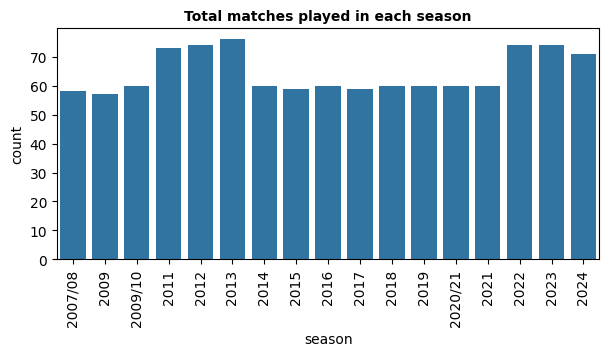

In [ ]:
plt.subplots(figsize=(7, 3))
sns.countplot(x="season",data=mat)
plt.xticks(rotation=90)
plt.title('Total matches played in each season', fontsize = 10, fontweight = "bold")
plt.show()

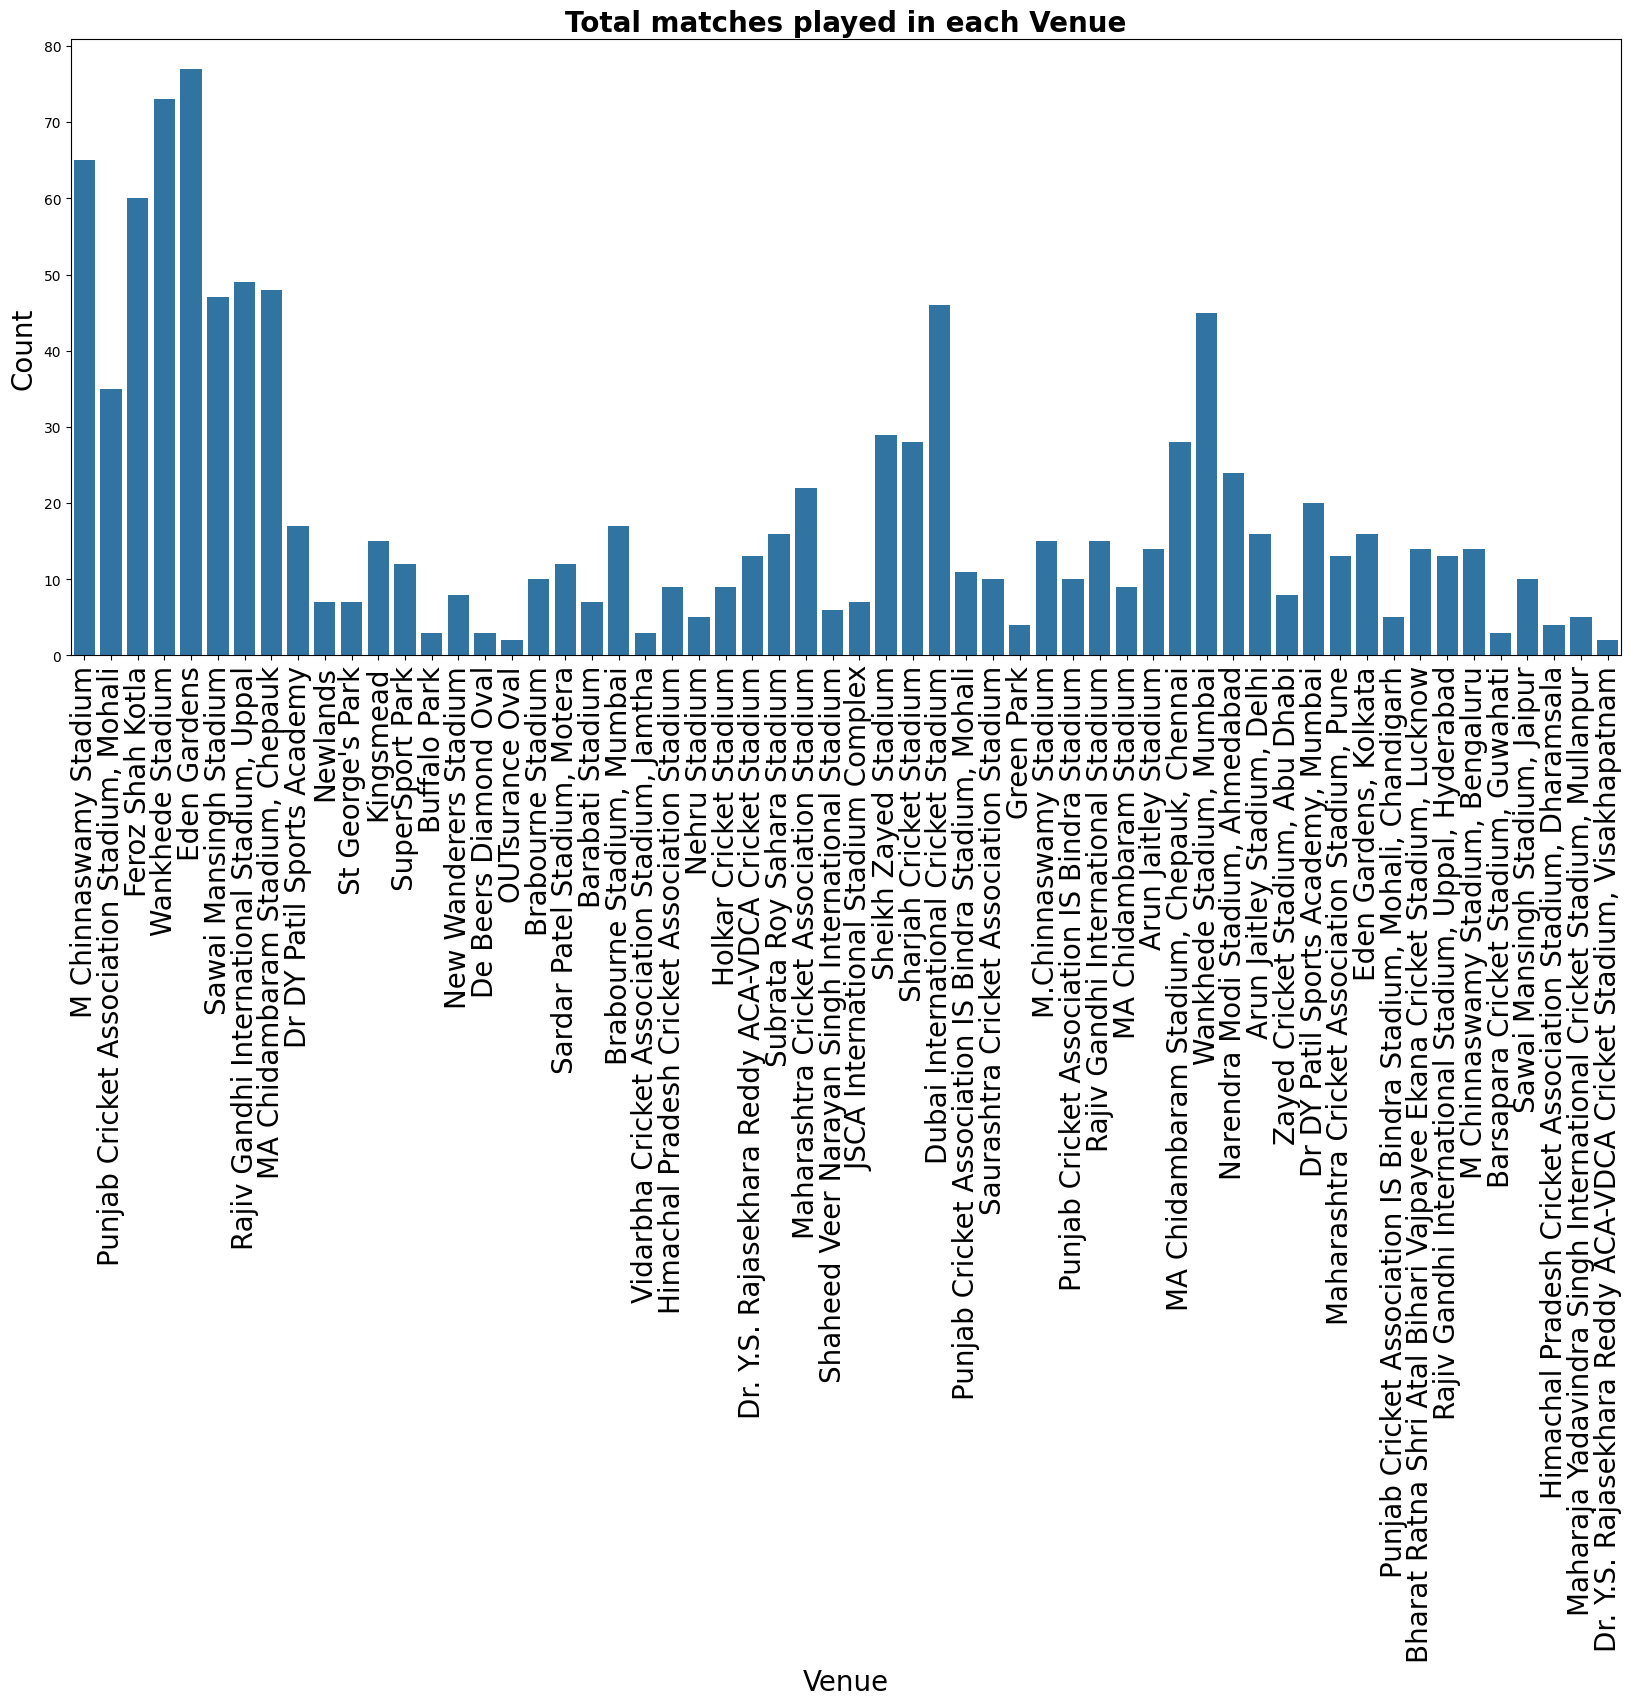

In [ ]:
#Number of matches playes in each stadium
# mat.venue.value_counts().head(15).plot(kind="bar",figsize=(16,10))

plt.subplots(figsize=(20, 8))
sns.countplot(x="venue",data=mat)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=10)
plt.xlabel('Venue', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Total matches played in each Venue', fontsize = 20, fontweight = "bold")
plt.show()

In [ ]:
def bat_first(x):
    if 'toss_winning_team'=='team1':
        if 'toss_decition'=='bat':
            return 'team1'
        else:
            return 'team2'
    elif 'toss_winning_team'=='team2':
        if 'toss_decition'=='bat':
            return 'team2'
        else:
            return 'team1'


In [ ]:
dev.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN


In [ ]:
df.columns

Index(['match_id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
filter=["team1","toss_winner"]

In [ ]:
tab=df[filter]
tab.groupby(["team1"]).agg("count")

,toss_winner
team1,
Chennai Super Kings,23787
Deccan Chargers,9448
Delhi Capitals,5133
Delhi Daredevils,19753
Gujarat Lions,3784
Gujarat Titans,21
Kings XI Punjab,21848
Kochi Tuskers Kerala,1563
Kolkata Knight Riders,22844


In [ ]:
mat.groupby(["team1"]).agg({"match_id":"count"})

,match_id
team1,
Chennai Super Kings,128
Deccan Chargers,39
Delhi Capitals,41
Delhi Daredevils,85
Gujarat Lions,16
Gujarat Titans,21
Kings XI Punjab,92
Kochi Tuskers Kerala,7
Kolkata Knight Riders,121


In [ ]:
season=df.groupby(['season'])['total_runs'].sum()
season

,total_runs
season,
2007/08,17937.0
2009,16353.0
2009/10,18883.0
2011,21154.0
2012,22453.0
2013,22602.0
2014,18931.0
2015,18353.0
2016,18862.0


<ipython-input-57-315f555c2062>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=season,palette="magma")


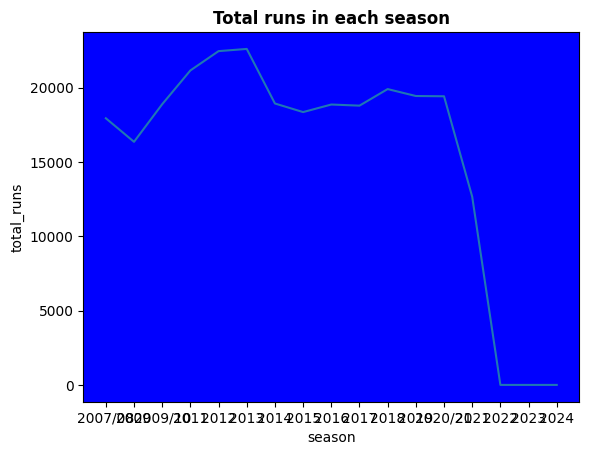

In [ ]:
# season=df.groupby(['season'])['total_runs'].sum()
ax = plt.axes()
ax.set(facecolor = "blue")
sns.lineplot(data=season,palette="magma")
plt.title('Total runs in each season',fontsize=12,fontweight="bold")
plt.show()

In [ ]:
x=dev.groupby(['batting_team'])['total_runs'].sum().reset_index().sort_values(by='total_runs',ascending=False)
y=x.reset_index(drop=True,inplace=True)
y
x

,batting_team,total_runs
0,Mumbai Indians,33933.0
1,Royal Challengers Bangalore,31780.0
2,Kolkata Knight Riders,30912.0
3,Chennai Super Kings,30119.0
4,Kings XI Punjab,30064.0
5,Rajasthan Royals,26131.0
6,Delhi Daredevils,24296.0
7,Sunrisers Hyderabad,20910.0
8,Deccan Chargers,11463.0
9,Delhi Capitals,6923.0


In [ ]:
mat["toss_winner"].value_counts().head(10)

,count
toss_winner,
Mumbai Indians,143
Kolkata Knight Riders,122
Chennai Super Kings,122
Rajasthan Royals,120
Royal Challengers Bangalore,113
Sunrisers Hyderabad,88
Kings XI Punjab,85
Delhi Daredevils,80
Delhi Capitals,50


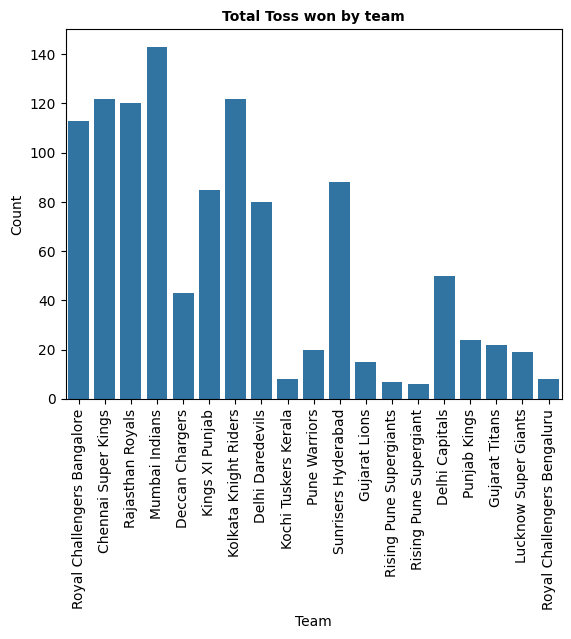

In [ ]:
sns.countplot(x="toss_winner",data=mat)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Team', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Total Toss won by team', fontsize = 10, fontweight = "bold")
plt.show()

In [ ]:
k=mat.toss_decision[ mat.toss_winner==mat.winner]
k

,toss_decision
1,bat
8,field
10,field
12,field
14,bat
...,...
1072,field
1073,bat
1075,field
1078,field


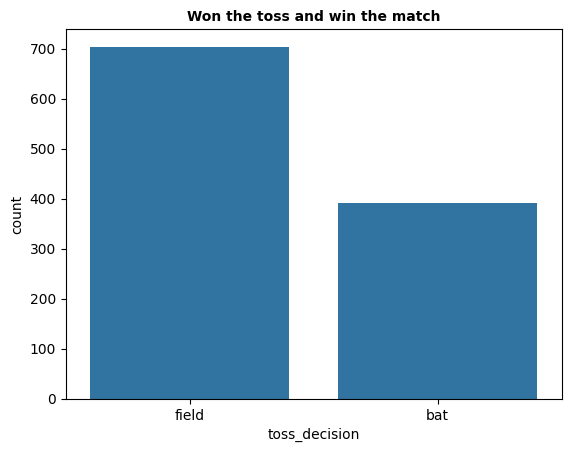

In [ ]:
sns.countplot(x="toss_decision",data=mat)
plt.title("Won the toss and win the match", fontsize = 10, fontweight = "bold")
plt.show()

In [ ]:
mat.head(3)

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar


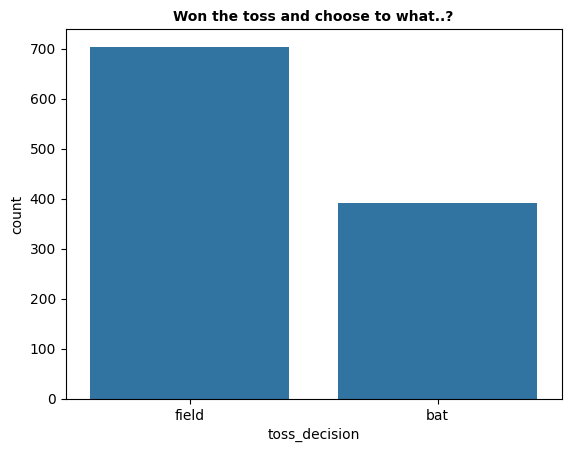

In [ ]:
sns.countplot(x="toss_decision",data=mat)
plt.title("Won the toss and choose to what..?", fontsize = 10, fontweight = "bold")
plt.show()


In [ ]:
mat.toss_decision.value_counts().plot(kind="pie", autopct='%1.1f%%')

NameError: name 'mat' is not defined

In [ ]:
dev.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

<Axes: xlabel='batter'>

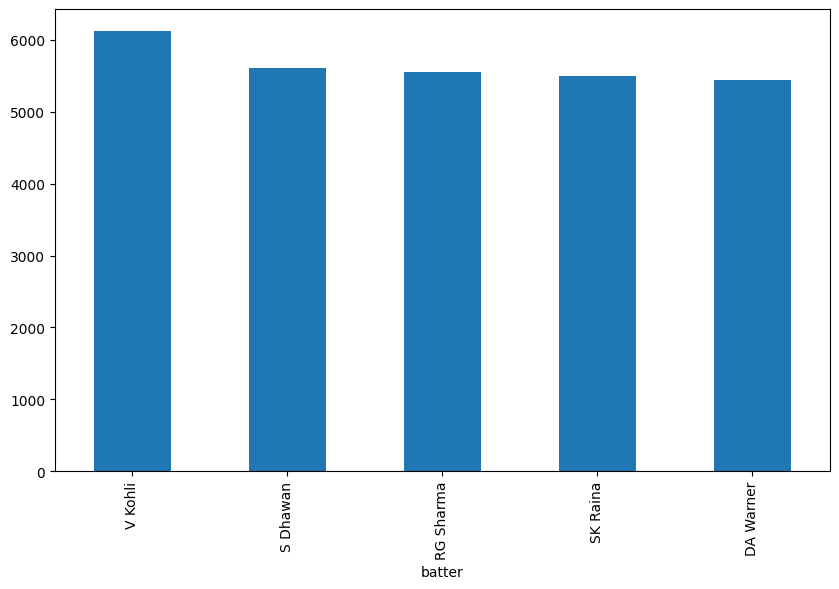

In [ ]:
dev.groupby(["batter"])["batsman_runs"].sum().sort_values(ascending=False).head(5).plot(kind="bar",figsize=(10,6))

In [ ]:
player = (dev['batter']=='V Kohli')
kohli =dev[player]

In [ ]:
def count(kohli,runs):
    return len(kohli[kohli['batsman_runs']==runs])*runs

In [ ]:
print("Runs scored from 1's :",count(kohli,1))
print("Runs scored from 2's :",count(kohli,2))
print("Runs scored from 3's :",count(kohli,3))
print("Runs scored from 4's :",count(kohli,4))
print("Runs scored from 6's :",count(kohli,6))

Runs scored from 1's : 2005
Runs scored from 2's : 708
Runs scored from 3's : 42
Runs scored from 4's : 2124
Runs scored from 6's : 1242


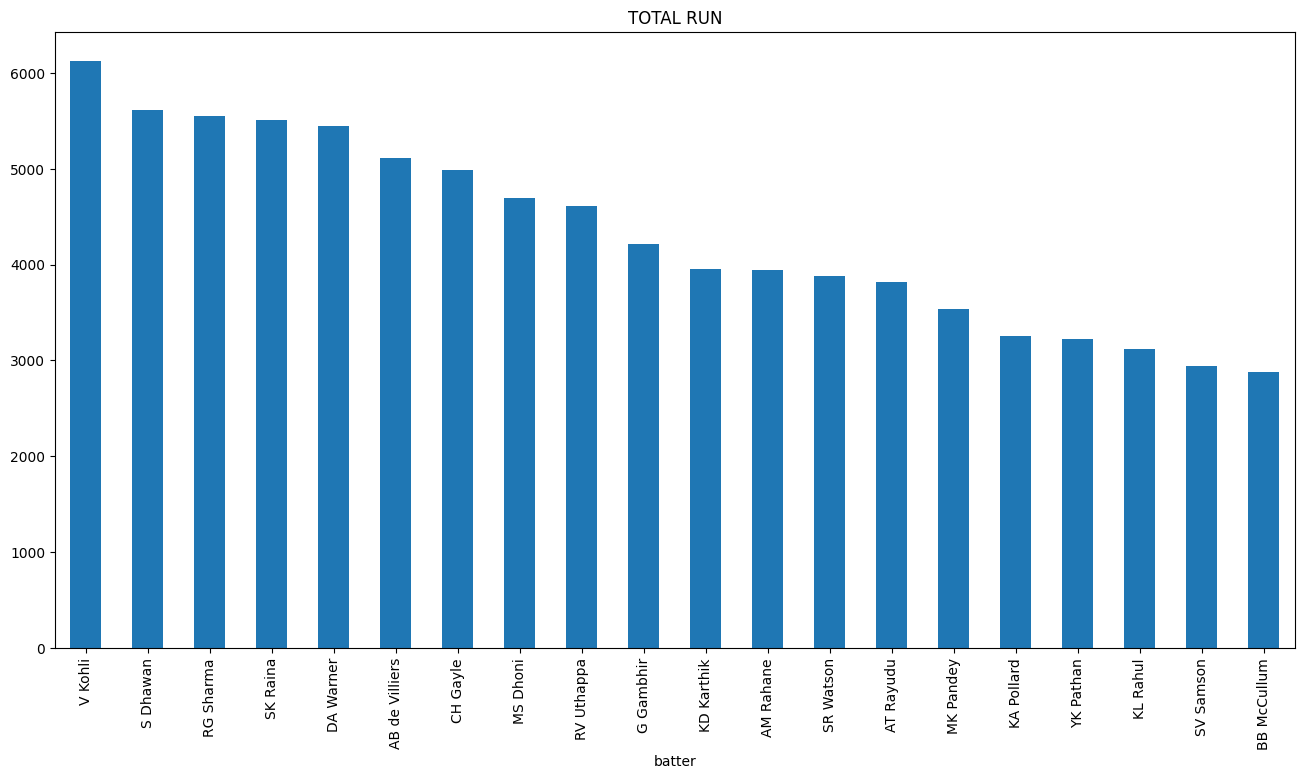

In [ ]:
dev.groupby(["batter"])["batsman_runs"].sum().sort_values(ascending=False).head(20).plot(kind="bar",figsize=(16,8))
plt.title("TOTAL RUN")
plt.show()

In [ ]:
strike_rate=dev.groupby(["batter"]).agg({"ball":"count","batsman_runs":"sum"}).sort_values(by="batsman_runs" ,ascending=False)

In [ ]:
strike_rate["strike_rate"]=strike_rate.batsman_runs/strike_rate.ball*100


In [ ]:
strike_rate.head(10)

,ball,batsman_runs,strike_rate
batter,,,
V Kohli,4813,6121.0,127.176397
S Dhawan,4527,5609.0,123.901038
RG Sharma,4347,5555.0,127.789280
SK Raina,4153,5504.0,132.530701
DA Warner,4006,5449.0,136.020969
AB de Villiers,3433,5117.0,149.053306
CH Gayle,3494,4982.0,142.587293
MS Dhoni,3552,4695.0,132.179054
RV Uthappa,3666,4611.0,125.777414


In [ ]:
df.groupby(["batter","season"])["batsman_runs"].sum().sort_values(ascending=False).head(10)

,,batsman_runs
batter,season,
V Kohli,2016,973.0
DA Warner,2016,848.0
KS Williamson,2018,735.0
CH Gayle,2012,733.0
MEK Hussey,2013,733.0
CH Gayle,2013,720.0
DA Warner,2019,692.0
AB de Villiers,2016,687.0
RR Pant,2018,684.0


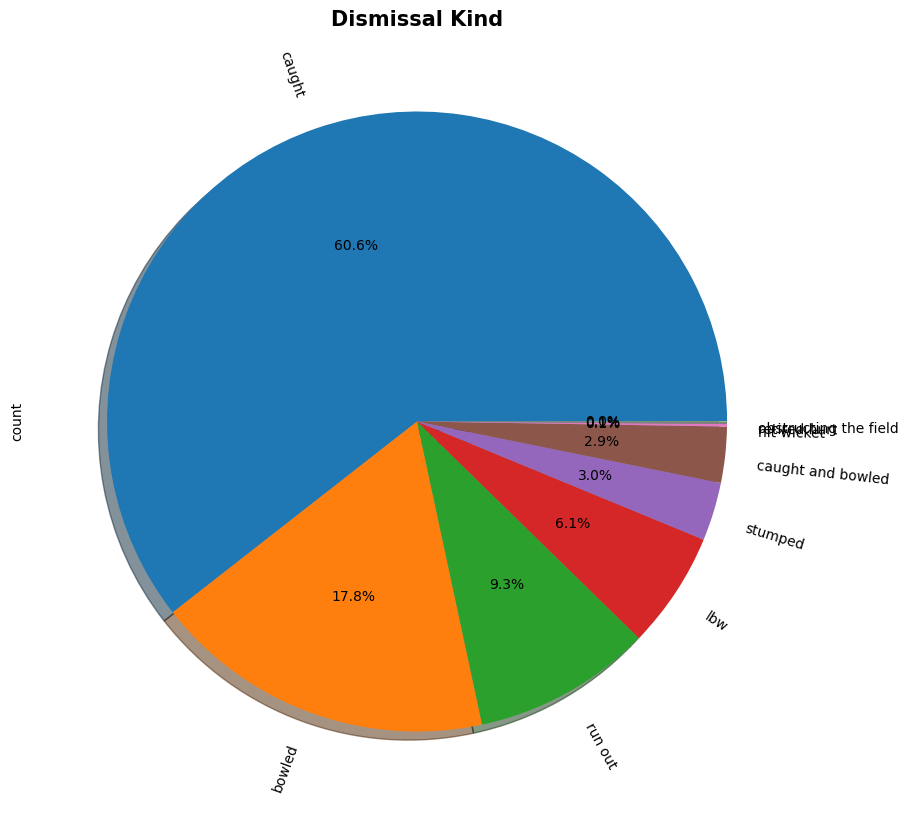

In [ ]:
plt.subplots(figsize=(10, 18))
dev['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels=True)
plt.title("Dismissal Kind",fontweight="bold",fontsize=15)
plt.show()

In [ ]:
dev.dismissal_kind.value_counts().head(20)

,count
dismissal_kind,
caught,6052
bowled,1780
run out,932
lbw,608
stumped,304
caught and bowled,292
hit wicket,13
retired hurt,11
obstructing the field,2


In [ ]:
dev.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN


In [ ]:
eco=dev.groupby("bowler").agg({"batsman_runs":"sum","ball":"count"}).sort_values(by="ball",ascending=False)


In [ ]:
eco["economy"]=eco["batsman_runs"]/(eco["ball"]/6)

In [ ]:
eco.head(10)

,batsman_runs,ball,economy
bowler,,,
Harbhajan Singh,3928.0,3496,6.741419
R Ashwin,3769.0,3492,6.475945
A Mishra,3897.0,3317,7.049141
PP Chawla,4234.0,3309,7.677244
SP Narine,3264.0,3001,6.525825
SL Malinga,3194.0,2974,6.443847
B Kumar,3359.0,2962,6.804186
DJ Bravo,3782.0,2959,7.668807
RA Jadeja,3597.0,2937,7.348315


In [ ]:
dev.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN


In [ ]:
df.groupby('bowler').agg({'total_runs':'sum','ball':'count','player_dismissed':'count'}).sort_values(by=['total_runs'],ascending=False).head(10)

,total_runs,ball,player_dismissed
bowler,,,
PP Chawla,4368.0,3309,165
Harbhajan Singh,4101.0,3496,161
A Mishra,4022.0,3317,175
DJ Bravo,4004.0,2959,181
R Ashwin,3950.0,3492,157
RA Jadeja,3708.0,2937,129
UT Yadav,3687.0,2648,137
B Kumar,3566.0,2962,150
SL Malinga,3486.0,2974,188


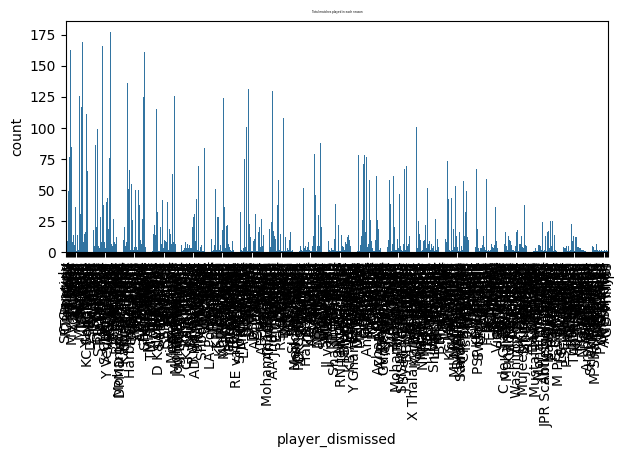

In [ ]:
plt.subplots(figsize=(7, 3))
sns.countplot(x="player_dismissed",data=dev)
plt.xticks(rotation=90)
plt.title('Total matches played in each season', fontsize = 2, fontweight = "light")
plt.show()

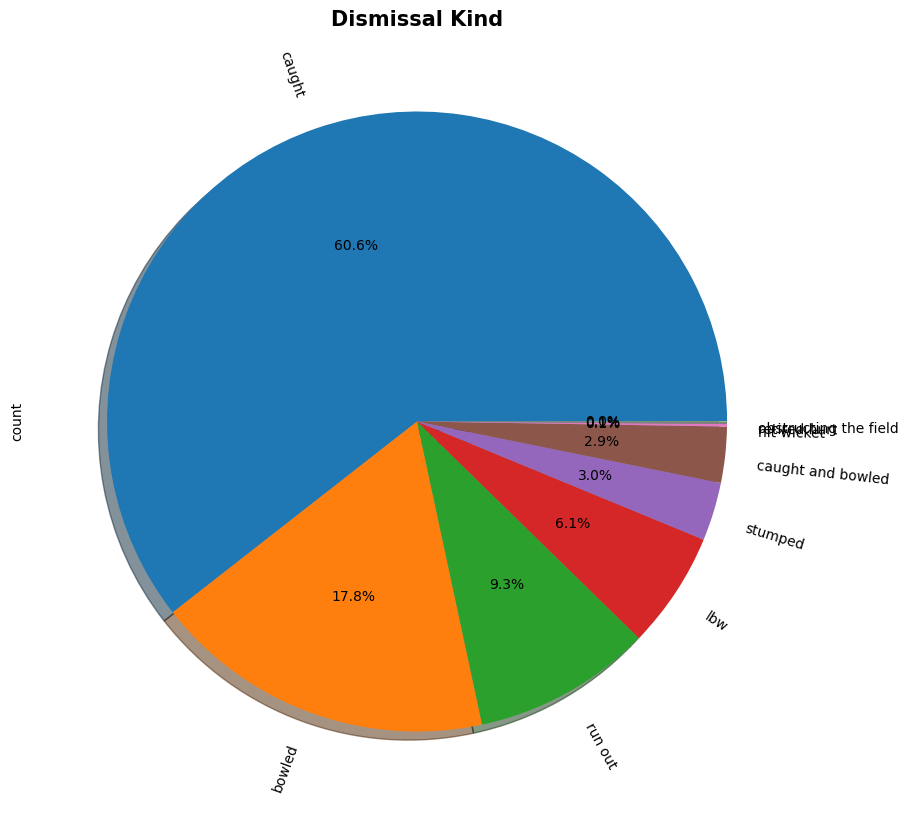

In [ ]:
plt.subplots(figsize=(10, 18))
dev['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels=True)
plt.title("Dismissal Kind",fontweight="bold",fontsize=15)
plt.show()